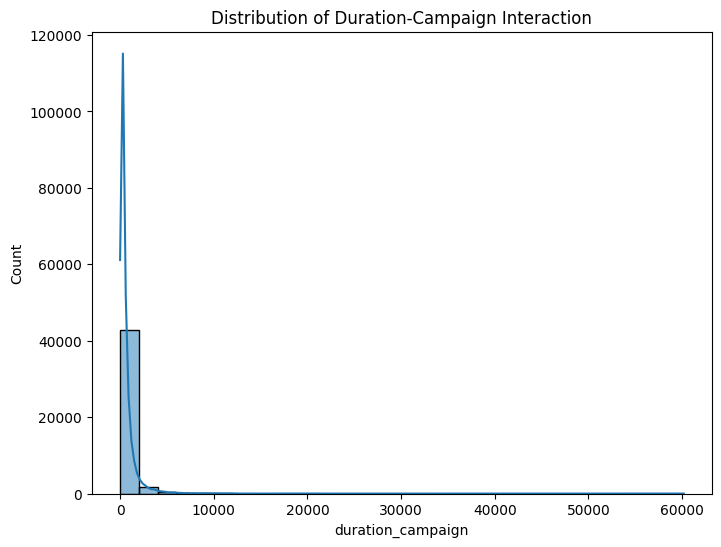

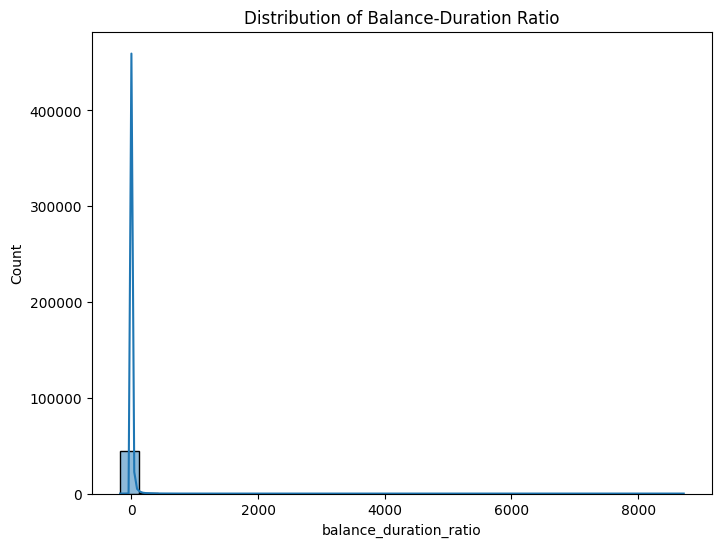

In [40]:
# Distribution of duration_campaign
plt.figure(figsize=(8, 6))
sns.histplot(df_scaled['duration_campaign'], kde=True, bins=30)
plt.title('Distribution of Duration-Campaign Interaction')
plt.show()

# Distribution of balance_duration_ratio
plt.figure(figsize=(8, 6))
sns.histplot(df_scaled['balance_duration_ratio'], kde=True, bins=30)
plt.title('Distribution of Balance-Duration Ratio')
plt.show()


In [41]:
print(df_scaled[['duration_campaign', 'balance_duration_ratio', 'y']].corr())


ValueError: could not convert string to float: 'no'

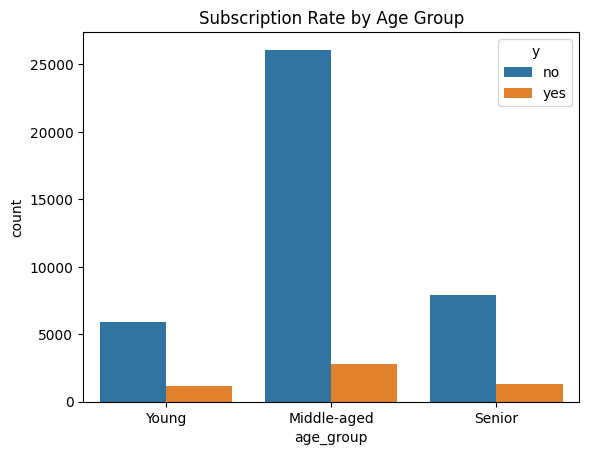

In [42]:
sns.countplot(x='age_group', hue='y', data=df_scaled)
plt.title('Subscription Rate by Age Group')
plt.show()


In [47]:
!pip install imblearn



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numeric columns only
numeric_columns = df_scaled.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_columns
vif_data['VIF'] = [variance_inflation_factor(df_scaled[numeric_columns].values, i) for i in range(len(numeric_columns))]

# Display the VIF values
print(vif_data)

                  Feature       VIF
0                     age  5.227111
1                 balance  1.445863
2                     day  4.001516
3                duration  3.596675
4                campaign  2.624199
5                   pdays  1.455775
6                previous  1.341741
7       duration_campaign  3.030788
8  balance_duration_ratio  1.248567


In [48]:
from imblearn.over_sampling import SMOTE

# Split features and target
X = df_scaled.drop(columns=['y'])
y = df_scaled['y']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display resampled dataset shape
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)


ValueError: Input contains NaN

In [63]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Train set size: (36168, 57)
Test set size: (9043, 57)


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create the pipeline
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('logistic', LogisticRegression(max_iter=1000, random_state=42))  # Logistic regression
])

# Train the model
logistic_pipeline.fit(X_train, y_train)

print(X_train.head())
print(X_train.dtypes)

Logistic Regression model trained successfully!
       age  balance  day  duration  campaign  pdays  previous  \
3344    41      849   15        72         1     -1         0   
17965   49     1415   30       269         2     -1         0   
18299   42     3842   31       130         4     -1         0   
10221   37     -119   11       375        11     -1         0   
32192   56     3498   15       264         2     -1         0   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  \
3344              True             False          False  ...   
17965            False             False          False  ...   
18299            False             False          False  ...   
10221            False             False          False  ...   
32192             True             False          False  ...   

       balance_group_Medium  balance_group_High  duration_category_Medium  \
3344                  False               False                     False   
17965                 

Accuracy: 0.8988167643481145

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      7952
        True       0.64      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.71      9043
weighted avg       0.88      0.90      0.89      9043


ROC-AUC Score: 0.9074679516143608


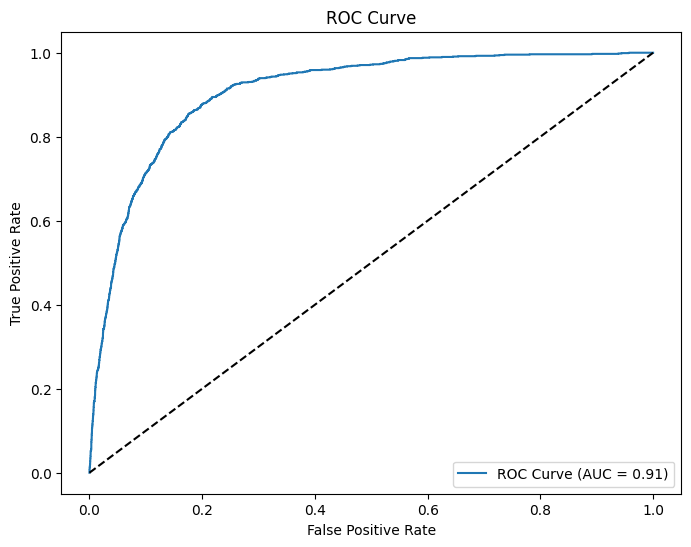

In [66]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = logistic_pipeline.predict(X_test)
y_prob = logistic_pipeline.predict_proba(X_test)[:, 1]  # Probability scores for ROC

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("Original class distribution:", y_train.value_counts())
print("New class distribution after SMOTE:", y_train_smote.value_counts())


Original class distribution: y_yes
False    31970
True      4198
Name: count, dtype: int64
New class distribution after SMOTE: y_yes
False    31970
True     31970
Name: count, dtype: int64


In [80]:
# Train the logistic regression model with the balanced dataset
logistic_pipeline.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = logistic_pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8842198385491541

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.95      0.93      7952
        True       0.52      0.44      0.48      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.69      0.71      9043
weighted avg       0.88      0.88      0.88      9043



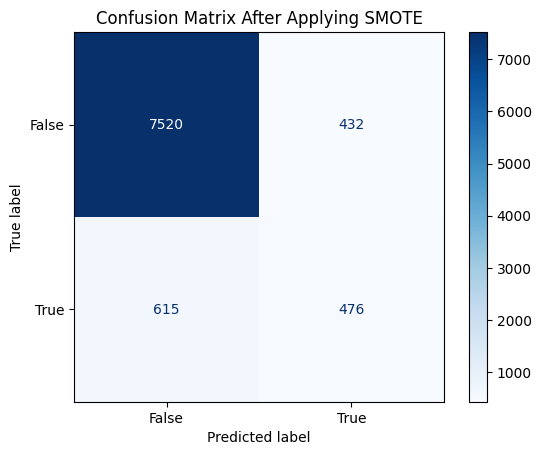

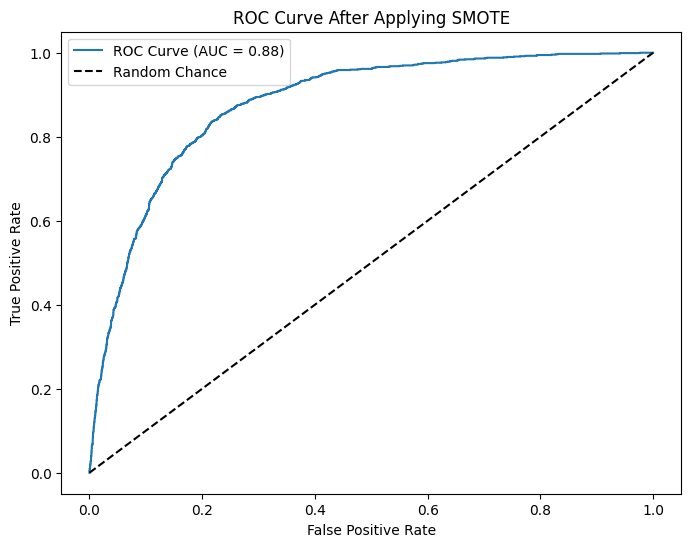

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_pipeline.classes_)

# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix After Applying SMOTE")
plt.show()
# Calculate probabilities for ROC curve
y_prob = logistic_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve After Applying SMOTE")
plt.legend()
plt.show()

Best Parameters: {'logistic__C': 0.01, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear'}
Best ROC-AUC Score: 0.9110959686118841
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      7952
        True       0.64      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.71      9043
weighted avg       0.88      0.90      0.89      9043



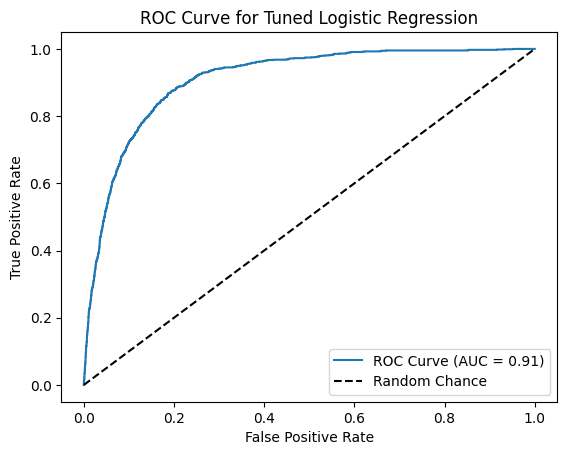

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'logistic__penalty': ['l1', 'l2'],  # Penalty type
    'logistic__solver': ['liblinear', 'saga']  # Solvers for l1 and l2
}

# Define the logistic regression pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('logistic', LogisticRegression(max_iter=1000, random_state=42))  # Logistic regression
])

# Perform grid search
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot ROC curve for the tuned model
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Tuned Logistic Regression")
plt.legend()
plt.show()


Accuracy: 0.9014707508570164

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      7952
        True       0.65      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



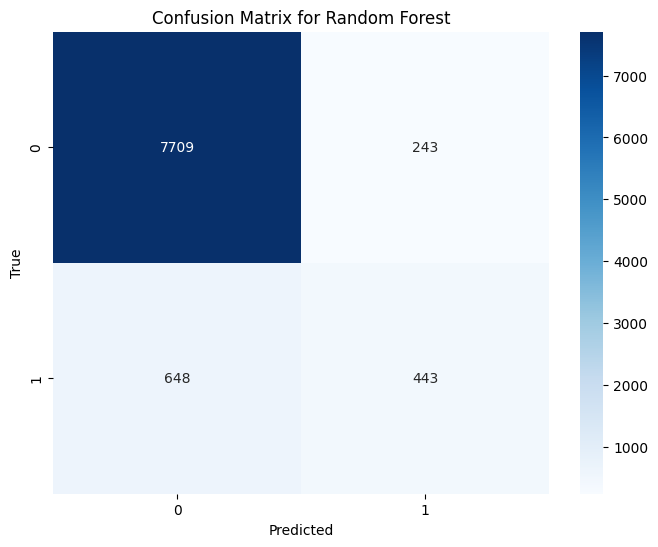

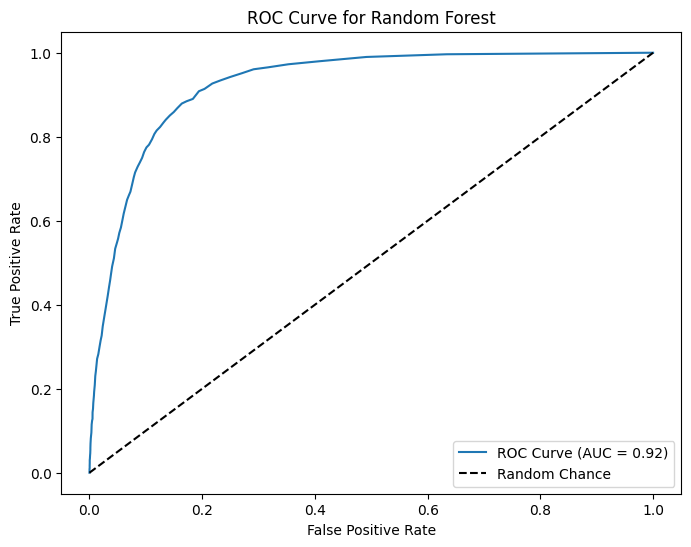

ROC-AUC Score: 0.9246362109411742


In [82]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve and AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.title("ROC Curve for Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print(f"ROC-AUC Score: {roc_auc}")


Accuracy: 0.8499
ROC-AUC Score: 0.9137
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.85      0.91      7952
        True       0.44      0.82      0.57      1091

    accuracy                           0.85      9043
   macro avg       0.70      0.84      0.74      9043
weighted avg       0.91      0.85      0.87      9043



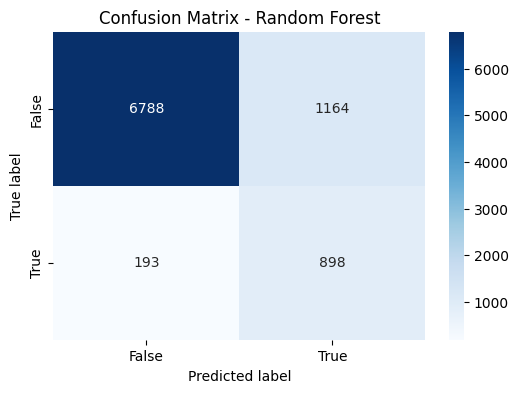

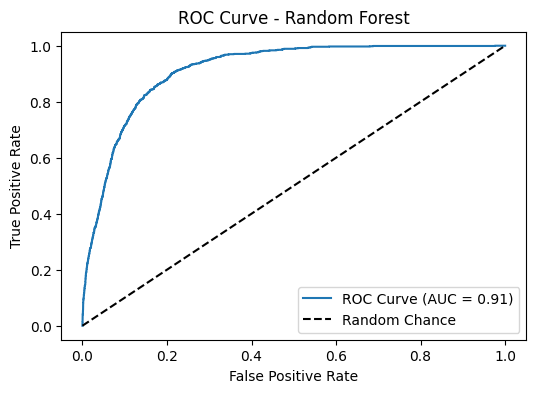

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Random Forest model with hyperparameters
tuned_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

# Train the model
tuned_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = tuned_rf.predict(X_test)
y_pred_proba_rf = tuned_rf.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_rf = tuned_rf.score(X_test, y_test)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")
print("Classification Report:")
print(report_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()